In [1]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as esw
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from glove.src import *
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
data = {}
wordSpace = []
root = './../'
threshold = 1000
for folder in ['train','test']:
    data[folder] = []
    for subf in ['pos','neg']:
        score = 1 if subf == 'pos' else 0
        path = os.path.join(root, folder, subf)
        files = os.listdir(path)
        print('loading %s' % path)
        for file in files:
            with open(os.path.join(path, file), "r",encoding = 'ISO-8859-1') as f:
                content = f.read().lower()
                wordCount = len(content.split(" "))
                if (wordCount < threshold):
                    data[folder].append([content, score, wordCount])
                    wordSpace.extend(content.split(" "))
np.random.shuffle(data['train'])
data["train"] = pd.DataFrame(data["train"],
                                  columns=['text', 'sentiment','wordCount'])

np.random.shuffle(data['test'])
data["test"] = pd.DataFrame(data["test"],
                                columns=['text', 'sentiment','wordCount'])

loading ./../train/pos
loading ./../train/neg
loading ./../test/pos
loading ./../test/neg


In [3]:
wordInfo = Counter(wordSpace)
sortedWordInfo = wordInfo.most_common()


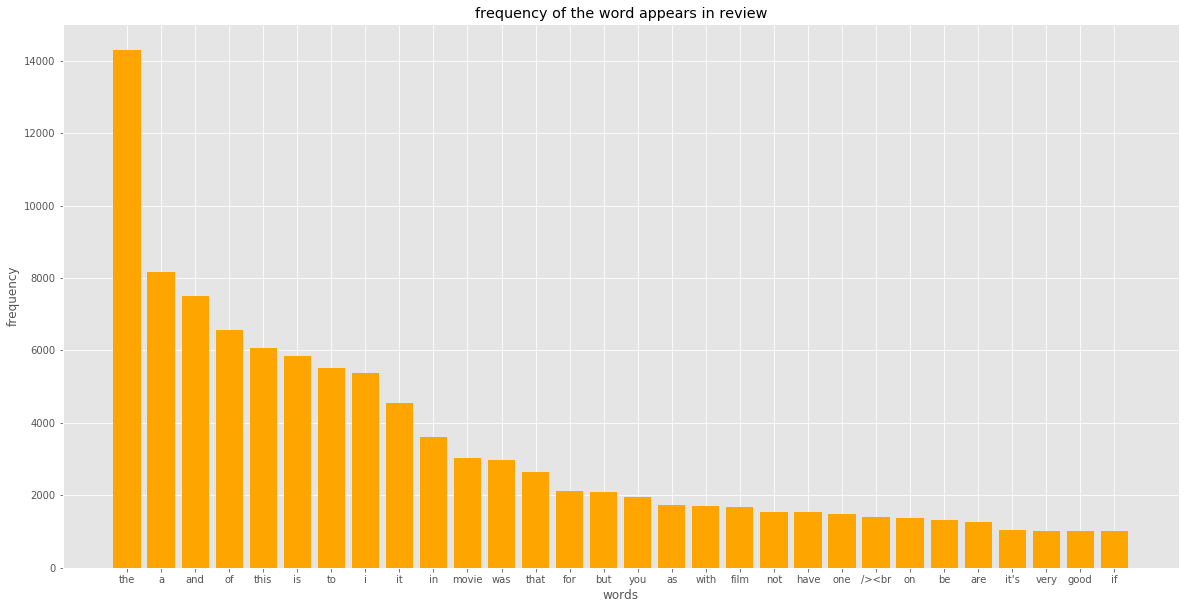

In [4]:
window = 30
i = 0
showWordValues = []
showWordCount = []
for key,fre in (enumerate(sortedWordInfo)):
    if (i == window):
        break
#     print ("'%s' ,"%sortedWordInfo[i][0])
    showWordValues.extend([sortedWordInfo[i][0]])
    showWordCount.extend([sortedWordInfo[i][1]])
    i += 1

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.bar(showWordValues, showWordCount, color='orange')

plt.xticks(showWordValues)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("frequency of the word appears in review")
plt.savefig("frequency of top 30 words.png")

movie
very
good
if
all
at
like
an
just
so
great
my
has
about
by
see
from
his
out
really
some
who
they
what
movie.
story
only
even
can
or


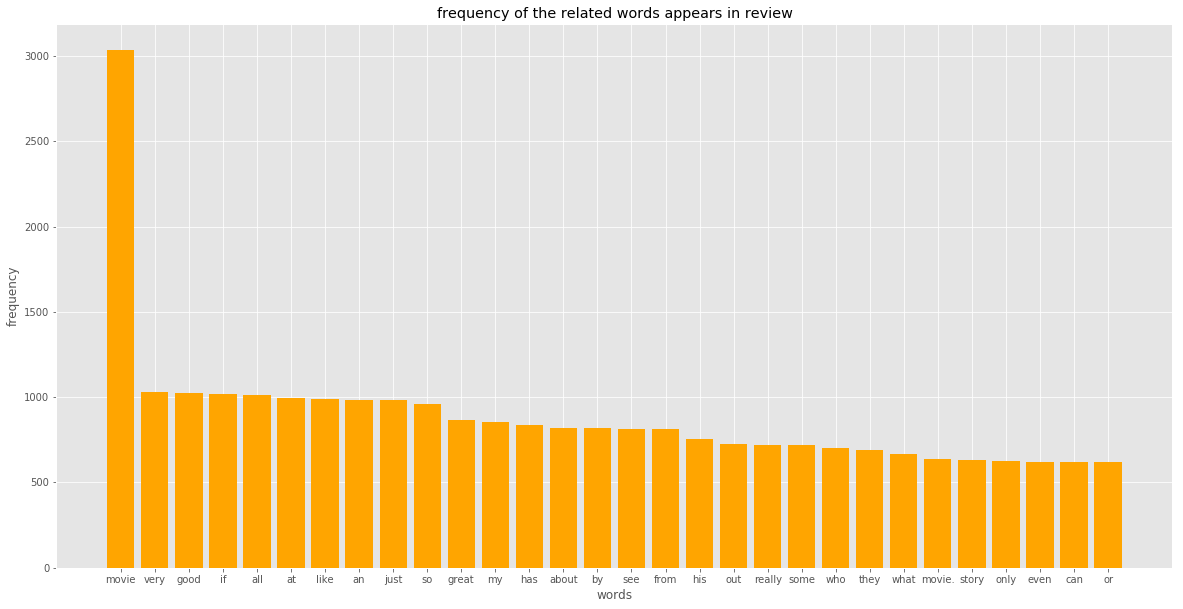

In [5]:
stopWords = {'the' ,
                'a' ,
                'and' ,
                'of' ,
                'this' ,
                'is' ,
                'to' ,
                'i' ,
                'it' ,
                'in' ,
                'was' ,
                'that' ,
                'for' ,
                'but' ,
                'you' ,
                'as' ,
                'with' ,
                'film' ,
                'not' ,
                'have' ,
                'one' ,
                '/><br' ,
                'on' ,
                'be' ,
                'are' ,
                "it's"}

showWordValues = []
showWordCount = []
i = 0
for key,fre in (enumerate(sortedWordInfo)):
    if (i == window):
        break
    if (sortedWordInfo[key][0] not in stopWords):
        print (sortedWordInfo[key][0])
        showWordValues.extend([sortedWordInfo[key][0]])
        showWordCount.extend([sortedWordInfo[key][1]])
        i += 1
    

plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.bar(showWordValues, showWordCount, color='orange')

plt.xticks(showWordValues)
plt.xlabel("words")
plt.ylabel("frequency")
plt.title("frequency of the related words appears in review")
plt.savefig("frequency of top 30 updated words.png")

In [6]:
trainDataX = data['train']['text']
trainDataY = data['train']['sentiment']
testDataX = data['test']['text']
testDataY = data['test']['sentiment']

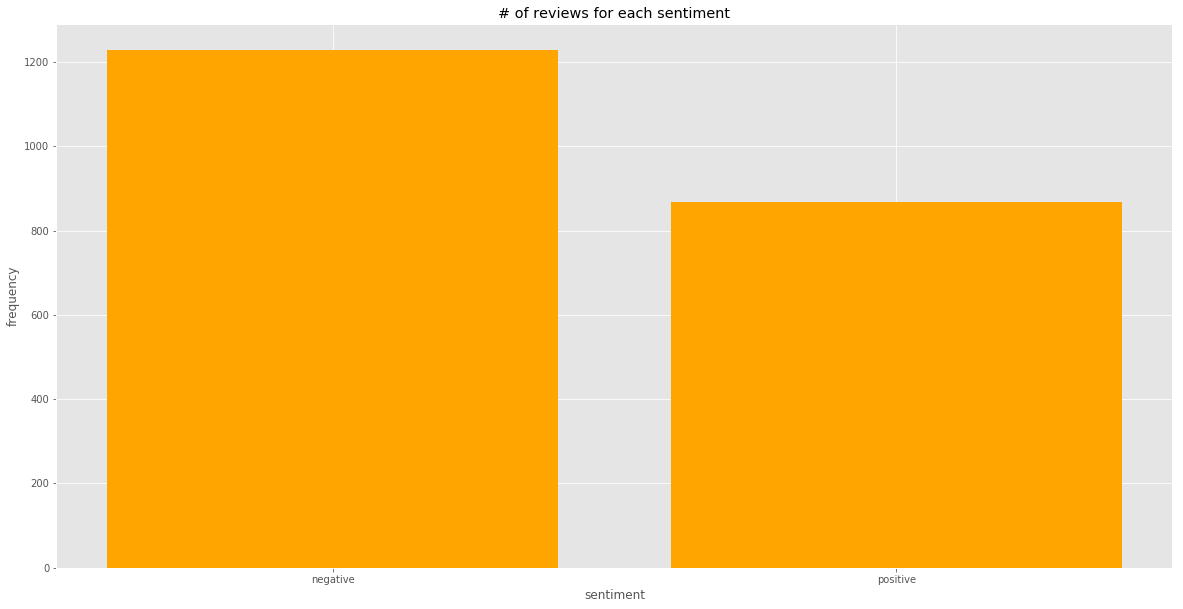

In [7]:
"""
text visualization, figure 1. Bar charts, which indicates frequency distribution of the review with specific word count.
"""
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.bar(['negative','positive'], Counter(trainDataY).values(), color='orange')

plt.xticks(['negative','positive'])
plt.xlabel("sentiment")
plt.ylabel("frequency")
plt.title("# of reviews for each sentiment")
plt.savefig("frequency of two sentiments.png")

In [8]:
wordCountTrainDataX = data['train']['wordCount']
wordCountElements = Counter(wordCountTrainDataX).keys() # equals to list(set(words))
wordCountFrequency = Counter(wordCountTrainDataX).values() # counts the elements' frequency

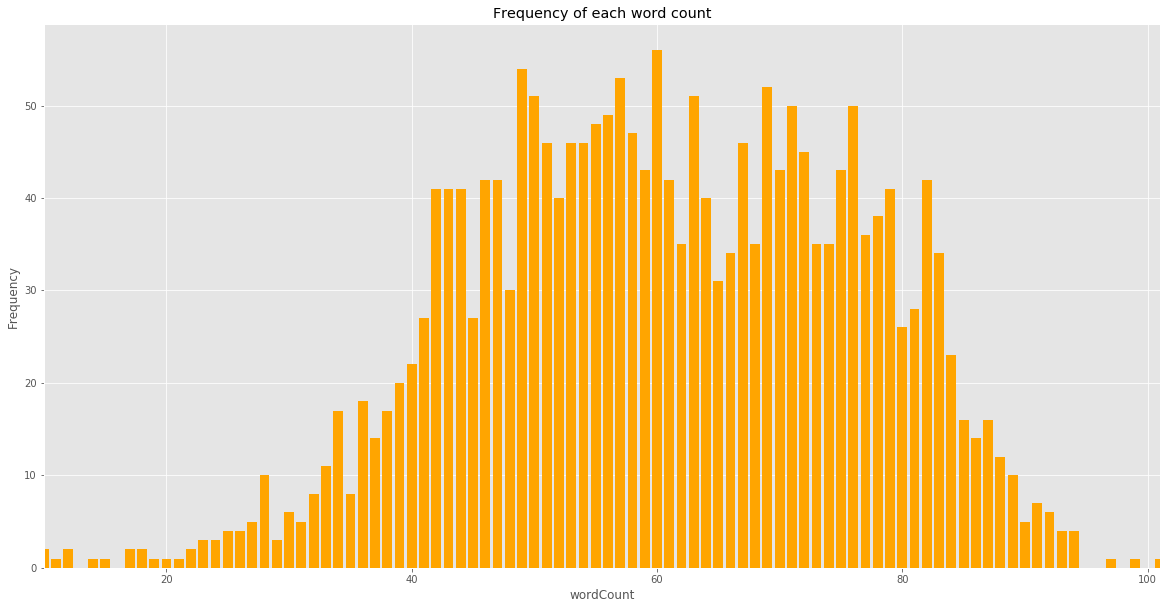

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(20,10))
plt.bar(wordCountElements, wordCountFrequency, color='orange')

plt.xlabel("wordCount")
plt.ylabel("Frequency")
plt.title("Frequency of each word count")
plt.xlim(min(wordCountElements), max(wordCountElements))
plt.savefig("frequency of each word count.png")